In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
States = ['NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL']
data = [1.0, 2, 3, 4 ,5 ,6 ,7 ,8 ,9, 10]
idx = pd.date_range('1/1/2012', periods=10, freq='MS') # freq='MS' 주기가 '월'의 시작일 ex 2012-01-01
df1 = pd.DataFrame(data, index=idx, columns=['Revenue'])
df1['State'] = States
df1

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


In [6]:
data2 = [10.0, 10.0, 9, 9, 8, 8, 7, 7, 6, 6]
idx2 = pd.date_range('1/1/2013', periods=10, freq='MS') 
df2 = pd.DataFrame(data2, index=idx2, columns=['Revenue'])
df2['State'] = States
df2

,Revenue,State
2013-01-01,10.0,NY
2013-02-01,10.0,NY
2013-03-01,9.0,NY
2013-04-01,9.0,NY
2013-05-01,8.0,FL
2013-06-01,8.0,FL
2013-07-01,7.0,GA
2013-08-01,7.0,GA
2013-09-01,6.0,FL
2013-10-01,6.0,FL


In [7]:
df = pd.concat([df1, df2]) # concat은 두개의 테이블을 합친다.(sql의 문자열 concat처럼 dataframe을 이어 붙임)
df

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


In [8]:
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) # 평균과의 차이
newdf['1.96*std'] = 1.96*newdf['Revenue'].std() # 95% 신뢰 구간
newdf['Outlier'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) > 1.96*newdf['Revenue'].std() # 95 신뢰 구간 이탈 판단
newdf

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,5.75,5.200273,True
2012-02-01,2.0,NY,4.75,5.200273,False
2012-03-01,3.0,NY,3.75,5.200273,False
2012-04-01,4.0,NY,2.75,5.200273,False
2012-05-01,5.0,FL,1.75,5.200273,False
2012-06-01,6.0,FL,0.75,5.200273,False
2012-07-01,7.0,GA,0.25,5.200273,False
2012-08-01,8.0,GA,1.25,5.200273,False
2012-09-01,9.0,FL,2.25,5.200273,False
2012-10-01,10.0,FL,3.25,5.200273,False


In [13]:
newdf = df.copy()

State = newdf.groupby('State') # 전체 dataframe을 특정 column으로 그룹화한 객체를 반환한다.

for idx, data in State:
    print(idx, data)

FL             Revenue State
2012-05-01      5.0    FL
2012-06-01      6.0    FL
2012-09-01      9.0    FL
2012-10-01     10.0    FL
2013-05-01      8.0    FL
2013-06-01      8.0    FL
2013-09-01      6.0    FL
2013-10-01      6.0    FL
GA             Revenue State
2012-07-01      7.0    GA
2012-08-01      8.0    GA
2013-07-01      7.0    GA
2013-08-01      7.0    GA
NY             Revenue State
2012-01-01      1.0    NY
2012-02-01      2.0    NY
2012-03-01      3.0    NY
2012-04-01      4.0    NY
2013-01-01     10.0    NY
2013-02-01     10.0    NY
2013-03-01      9.0    NY
2013-04-01      9.0    NY


In [25]:
# 두가지 이상으로도 group 가능
newdf = df.copy()

StateMonth = newdf.groupby(['State', lambda x : x.month])

for idx, data in StateMonth:
    print(idx, data)

('FL', 5)             Revenue State
2012-05-01      5.0    FL
2013-05-01      8.0    FL
('FL', 6)             Revenue State
2012-06-01      6.0    FL
2013-06-01      8.0    FL
('FL', 9)             Revenue State
2012-09-01      9.0    FL
2013-09-01      6.0    FL
('FL', 10)             Revenue State
2012-10-01     10.0    FL
2013-10-01      6.0    FL
('GA', 7)             Revenue State
2012-07-01      7.0    GA
2013-07-01      7.0    GA
('GA', 8)             Revenue State
2012-08-01      8.0    GA
2013-08-01      7.0    GA
('NY', 1)             Revenue State
2012-01-01      1.0    NY
2013-01-01     10.0    NY
('NY', 2)             Revenue State
2012-02-01      2.0    NY
2013-02-01     10.0    NY
('NY', 3)             Revenue State
2012-03-01      3.0    NY
2013-03-01      9.0    NY
('NY', 4)             Revenue State
2012-04-01      4.0    NY
2013-04-01      9.0    NY


In [26]:
newdf = df.copy()

StateMonth = newdf.groupby(['State', lambda x : x.month])

# 구성한 그룹끼리의 연산
newdf['Outlier'] = StateMonth.transform( lambda x: abs(x-x.mean()) > 1.96*x.std() )
newdf['x-Mean'] = StateMonth.transform( lambda x: abs(x-x.mean()) )
newdf['1.96*std'] = StateMonth.transform( lambda x: 1.96*x.std() )
newdf

,Revenue,State,Outlier,x-Mean,1.96*std
2012-01-01,1.0,NY,False,4.5,12.473364
2012-02-01,2.0,NY,False,4.0,11.087434
2012-03-01,3.0,NY,False,3.0,8.315576
2012-04-01,4.0,NY,False,2.5,6.929646
2012-05-01,5.0,FL,False,1.5,4.157788
2012-06-01,6.0,FL,False,1.0,2.771859
2012-07-01,7.0,GA,False,0.0,0.000000
2012-08-01,8.0,GA,False,0.5,1.385929
2012-09-01,9.0,FL,False,1.5,4.157788
2012-10-01,10.0,FL,False,2.0,5.543717


In [21]:
newdf = df.copy()

State = newdf.groupby(['State'])

# apply(func)으로도 적용 가능
def s(group):
    group['x-Mean'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) 
    group['1.96*std'] = 1.96*newdf['Revenue'].std()
    group['Outlier'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) > 1.96*newdf['Revenue'].std()
    return group

Newdf2 = State.apply(s)
Newdf2

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,5.75,5.200273,True
2012-02-01,2.0,NY,4.75,5.200273,False
2012-03-01,3.0,NY,3.75,5.200273,False
2012-04-01,4.0,NY,2.75,5.200273,False
2012-05-01,5.0,FL,1.75,5.200273,False
2012-06-01,6.0,FL,0.75,5.200273,False
2012-07-01,7.0,GA,0.25,5.200273,False
2012-08-01,8.0,GA,1.25,5.200273,False
2012-09-01,9.0,FL,2.25,5.200273,False
2012-10-01,10.0,FL,3.25,5.200273,False


In [27]:
# csv write
file_name = "./analyzed_american.csv"
Newdf2.to_csv(file_name)

In [81]:
# 간단한 시각화
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) # default freq : day
ts

2000-01-01    0.118490
2000-01-02    0.550236
2000-01-03   -0.748471
2000-01-04    2.128605
2000-01-05   -0.583385
                ...   
2002-09-22   -0.711398
2002-09-23   -0.489410
2002-09-24    0.141444
2002-09-25    0.445443
2002-09-26    1.834082
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

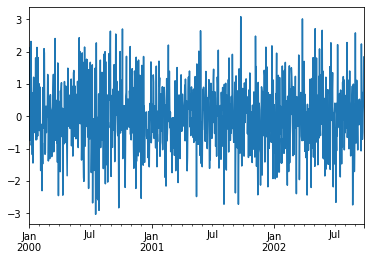

In [82]:
%matplotlib inline

ts.plot()

<AxesSubplot:>

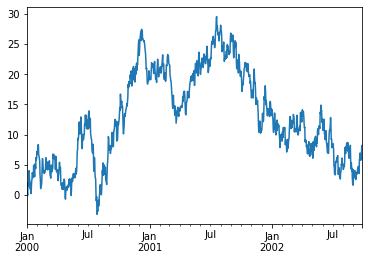

In [83]:
ts = ts.cumsum() # 누적 합
ts.plot()

<AxesSubplot:>

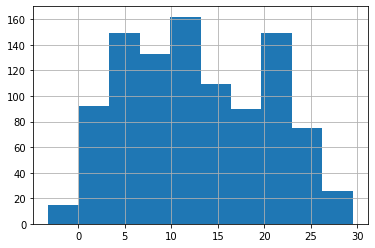

In [84]:
ts.hist()